In [6]:
import pandas as pd
import matplotlib.pyplot as plt


"""
loop, time_s, sample, max_samples
0, 0.0027277000481262803, 0, 2001
1, 0.003553300048224628, 0, 2001
2, 0.015485499985516071, 3, 2001
"""

df = pd.read_csv("data.csv")
print(df.head())


   loop    time_s  sample  max_samples
0     0  0.002728       0         2001
1     1  0.003553       0         2001
2     2  0.015485       3         2001
3     3  0.019507      14         2001
4     4  0.019690      19         2001


Index(['loop', 'time_s', 'sample', 'max_samples', 'dt', 'dt_deviation',
       'sample_rate', 'mean_time_per_sample', 'remaining_samples'],
      dtype='object')


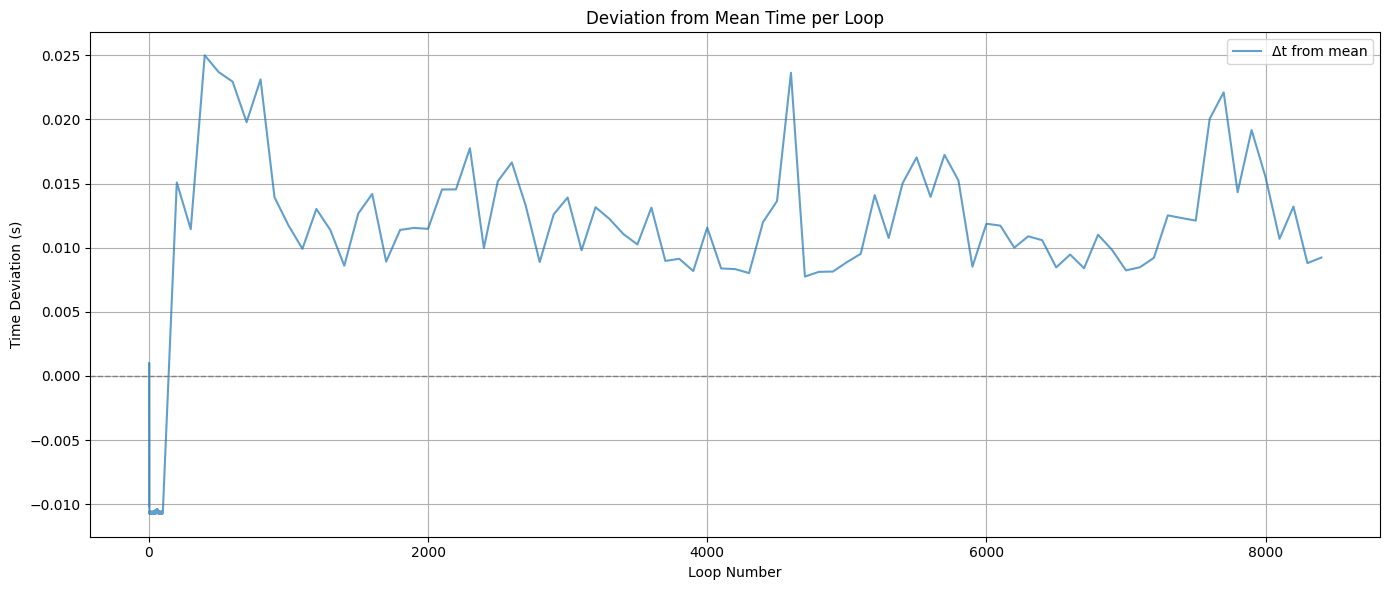

In [12]:
import numpy as np


print(df.columns)
# Compute time difference between consecutive loops
df["dt"] = df["time_s"].diff()
mean_dt = df["dt"].mean()
df["dt_deviation"] = df["dt"] - mean_dt

# Plot 1: Deviation from mean loop duration
plt.figure(figsize=(14, 6))
plt.plot(df["loop"], df["dt_deviation"], label="Δt from mean", alpha=0.7)
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Deviation from Mean Time per Loop")
plt.xlabel("Loop Number")
plt.ylabel("Time Deviation (s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


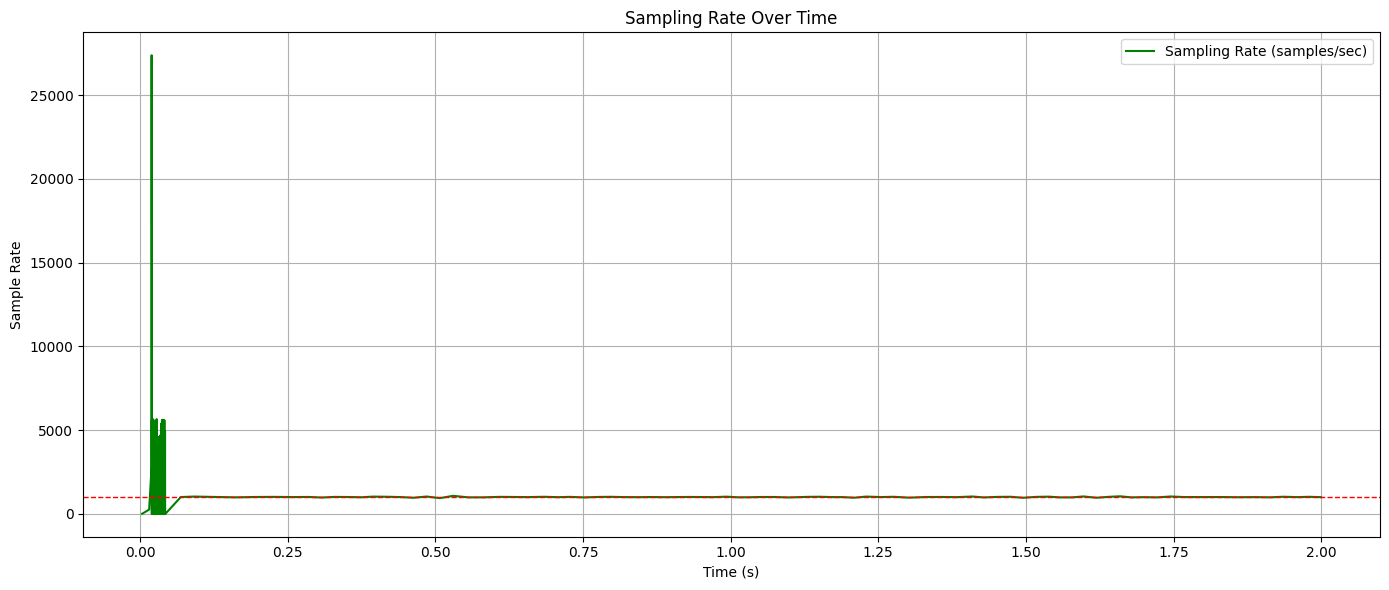

In [13]:

# Plot 2: Sampling rate over time
df["sample_rate"] = df["sample"].diff() / df["dt"]
plt.figure(figsize=(14, 6))
plt.plot(
    df["time_s"], df["sample_rate"], label="Sampling Rate (samples/sec)", color="green"
)
plt.title("Sampling Rate Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Sample Rate")
# ADD HORIZONTAL LINE AT 1000
plt.axhline(1000, color="red", linestyle="--", linewidth=1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# plot 3: mean time per sample
The mean time per sample should be very consistent across all the samples. However, we see that there is a very high variance in the time per sample. Starting from the beginning at around 0.004 s per sample, and decreasing to around 0.001 s per sample after the first 0.5s. This is showing the system coming to a steady state in terms of the time it takes to collect the samples, as well as the influence of the actions we are performing during recording. 
```python

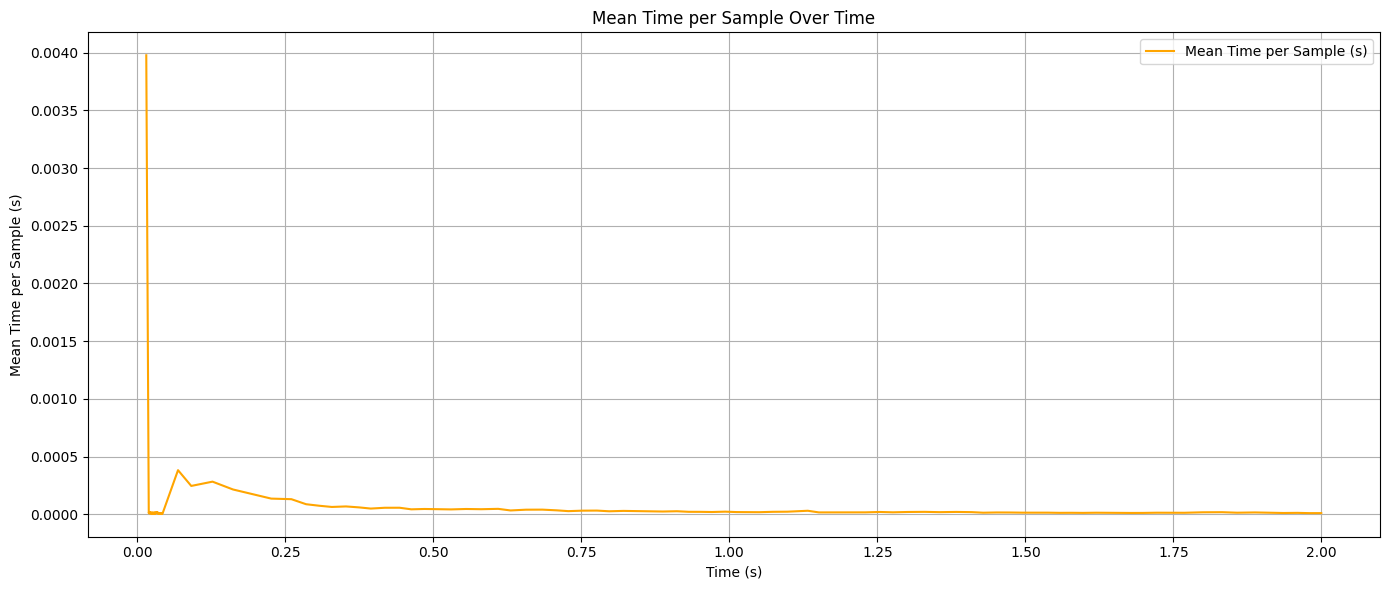

In [ ]:
# plot 3: mean time per sample


df["mean_time_per_sample"] = df["dt"] / df["sample"].replace(0, np.nan)

plt.figure(figsize=(14, 6))
plt.plot(df["time_s"], df["mean_time_per_sample"], label="Mean Time per Sample (s)", color="orange")
plt.title("Mean Time per Sample Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Mean Time per Sample (s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Plot 4. Remaining samples over time

We can see a linear relation between the number of remaining samples and time. The problem is near the beginning, where there is a plateau before the samples begin to decrease. So perhaps there is a timing issue with the beginning of the recording phase, and we can start recording earlier. 

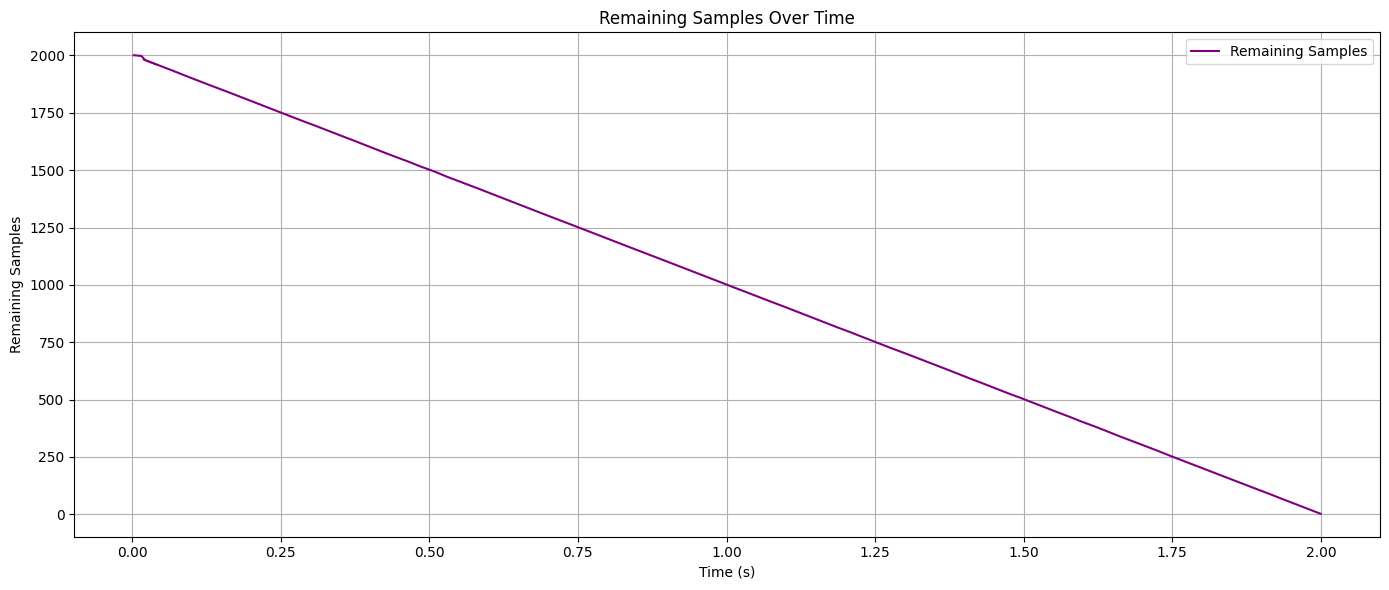

In [16]:

# plot 4: Show the remaining samples to be acquired over time
df["remaining_samples"] = df["max_samples"] - df["sample"]
plt.figure(figsize=(14, 6))
plt.plot(df["time_s"], df["remaining_samples"], label="Remaining Samples", color="purple")
plt.title("Remaining Samples Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Remaining Samples")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()